# GMIT 52465 Programming for Data Analysis - Project

## Mark Kelly 14/12/2018



## Problem statement 

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.

Speciﬁcally, in this project you should: 

• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four diﬀerent variables. 

• Investigate the types of variables involved, their likely distributions, and their relationships with each other. • Synthesise/simulate a data set as closely matching their properties as possible. 

• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook. 

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own ﬁles. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 


## Real World phenomenon

I recently put my car through the NCT and it got me thinking about overall pass/failure rates and what are the main issues experienced during the test. This information can be retrieved from the Data.Gov.ie website. 

https://data.gov.ie/dataset/2016-make-model-year-failures-at-nct

A dataset regarding NCT Failure rates during 2016 has been created by the Raod Safety Authority. This contains each car manufacture/ model and car year and the results of it's test and if it failed, why. For this project, I am going to simulate this dataset.

The test is broken up into 14 categories. These are listed below. 
A quick initial analysis of the data was conducted along with the actual total number of fails and the percentage of fails for tests completed in 2016.



|	                     		|Total Fails|   %|
|-------------------------------|-----------|----|
|Lighting and Electrical		|294683		|20.11|
|Steering and Suspension		|225581		|15.39|
|Wheels and Tyres			    |203970		|13.92|
|Brake Test			            |175342		|11.96|
|Vehicle and Safety Equipment	|152620		|10.41|
|Braking Equipment		    |137434		|9.38|
|Light test			        |102179		|6.97|
|Engine, Noise and Exhaust	|87815		|5.99|
|Emmissions			        |80061		|5.46|
|Chassis and Body			    |9826		|5.45|
|Suspension Test			    |78966		|5.39|
|OTHER				        |6623		|0.45|
|Incompletable			    |1072		|0.07|
|-------------------------------------------|--------------|-------|
|Sum of PASS				            |702779		|47.95|
|Sum of FAIL				            |762931		|52.05|
|Sum of Total				        |1465710|	|

Each car manufacturer and model is listed for each year of manufacture of every car that was tested in 2016. This has resulted in 8165 unique categories which is too many for a simulated dataset. 

With this simulation, I will only list the top 15 of car manufacturers in terms of cars tested (accounted for 85% of all tests in 2016) and not the model types. Also, the year of the car manufacture or 'birth' is limited to the year 2000 to 2016. 



Here, I am listing the manufacturers and years along with the usual function declarations.

In [60]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
pd.options.mode.chained_assignment = None #This is remove a warning that pops up when creating the 'Fail' and ' Pass' columns.


make=["Audi","BMW","Ford","Opel","Skoda","Nissan", "Volkswagen", "Hyundai", "Toyota", "Honda", "Peugeot", "Mazda", "Mercedes Benz", "Renault","Citroen"]
year=["2016","2015", "2014","2013","2012","2011","2010","2009","2008","2007","2006","2005","2004","2003","2002","2001","2000",]


I found it more straightforward to create one of the fail columns first. The random function I am using is the binomial function. The result is either a Pass or a Fail (1 or 0). The probability of failing due to a Lighting or Electrical Failure is 20% in the NCT results so this was replicated using the value 0.2 in the binomial function. This will result in 10,000 values for this column created in a dataframe called 'df'.

In [3]:
df = pd.DataFrame(np.random.binomial(1, 0.2, 10000), columns=["Lighting and Electrical Fails"])

To match up this dataframe with a manufacturer, an array is created called 'makelist' with 10000 null values. 
This array is populated with a random value from the manufacturer list and then added into the dataframe into a column called 'Manufacturer'.

In [4]:
i=0
makelist = [None]*10000

for i in range(len(df)):
    makelist[i] = random.choice(make)

se = pd.Series(makelist)
df['Manufacturer'] = se.values
df

,Lighting and Electrical Fails,Manufacturer
0,0,Ford
1,0,Hyundai
2,1,Mazda
3,0,Hyundai
4,0,Renault
5,0,Skoda
6,0,Nissan
7,0,Nissan
8,0,Honda
9,0,Opel


Using the same method the dataframe has a 'Year' column created and a randomly assigned year from the list.

In [5]:
yearlist = [None]*10000

for i in range(len(df)):
    yearlist[i] = random.choice(year)
    
se2 = pd.Series(yearlist)
df['Year'] = se2.values

In [6]:
df

,Lighting and Electrical Fails,Manufacturer,Year
0,0,Ford,2015
1,0,Hyundai,2001
2,1,Mazda,2010
3,0,Hyundai,2004
4,0,Renault,2010
5,0,Skoda,2006
6,0,Nissan,2008
7,0,Nissan,2002
8,0,Honda,2012
9,0,Opel,2002


The other categories are created in a similar fashion using the random binomial function with the probability of a fail matching the actual results from our original NCT data.

In [7]:
df['Steering and Suspension Fails'] = np.random.binomial(1, 0.15, 10000)
df['Wheels and Tyres Fails'] = np.random.binomial(1, 0.14, 10000)
df['Brake Test Fails'] = np.random.binomial(1, 0.12, 10000)
df['Side Slip Test Fails'] = np.random.binomial(1, 0.115, 10000)
df['Vehicle and Safety Equipment Fails'] = np.random.binomial(1, 0.104, 10000)
df['Braking Equipment Fails'] = np.random.binomial(1, 0.093, 10000)
df['Light Test Fails'] = np.random.binomial(1, 0.069, 10000)
df['Engine, Noise and Exhaust Fails'] = np.random.binomial(1, 0.059, 10000)
df['Emmissions Fails'] = np.random.binomial(1, 0.054, 10000)
df['Chassis and Body Fails'] = np.random.binomial(1, 0.054, 10000)
df['Suspension Test Fails'] = np.random.binomial(1, 0.053, 10000)
df['OTHER Fails'] = np.random.binomial(1, 0.0045, 10000)
df['Incompletable Fails'] = np.random.binomial(1, 0.0007, 10000)

In [8]:
df

,Lighting and Electrical Fails,Manufacturer,Year,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails
0,0,Ford,2015,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,Hyundai,2001,1,1,0,1,0,0,0,1,1,1,0,0,0
2,1,Mazda,2010,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,Hyundai,2004,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,Renault,2010,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,Skoda,2006,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,Nissan,2008,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,Nissan,2002,0,0,1,1,1,0,0,0,0,0,0,0,0
8,0,Honda,2012,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,Opel,2002,0,1,0,0,0,0,0,0,0,0,0,0,0


To make the dataset more readable, the columns are reordered.

In [9]:
df = df[['Manufacturer', 'Year', 'Lighting and Electrical Fails', 'Steering and Suspension Fails', 'Wheels and Tyres Fails', 'Brake Test Fails', 'Side Slip Test Fails', 'Vehicle and Safety Equipment Fails', 'Braking Equipment Fails', 'Light Test Fails', 'Engine, Noise and Exhaust Fails', 'Emmissions Fails', 'Chassis and Body Fails', 'Suspension Test Fails', 'OTHER Fails', 'Incompletable Fails']]

In [10]:
df

,Manufacturer,Year,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails
0,Ford,2015,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Hyundai,2001,0,1,1,0,1,0,0,0,1,1,1,0,0,0
2,Mazda,2010,1,1,0,0,0,0,0,0,0,0,1,0,0,0
3,Hyundai,2004,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Renault,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Skoda,2006,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,Nissan,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,Nissan,2002,0,0,0,1,1,1,0,0,0,0,0,0,0,0
8,Honda,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,Opel,2002,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Using the Describe and bar chart functions, it is possible to see that the failure rates in each category match very closely with the original data. 20% of fails are due to Lighting and Electrical Faults. The next highest category is Steering and Suspension with approximately 15% fails. The category with the lowest fails is the 'Incompletable' section with a failure rate of 0.05%.

In [11]:
df.describe()

,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.197500,0.155900,0.144400,0.124100,0.121500,0.106300,0.093000,0.068500,0.061700,0.051800,0.064200,0.053300,0.003700,0.000600
std,0.398133,0.362779,0.351512,0.329712,0.326724,0.308237,0.290447,0.252615,0.240622,0.221634,0.245121,0.224642,0.060718,0.024489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5,1,'Total Number of Category Fails')

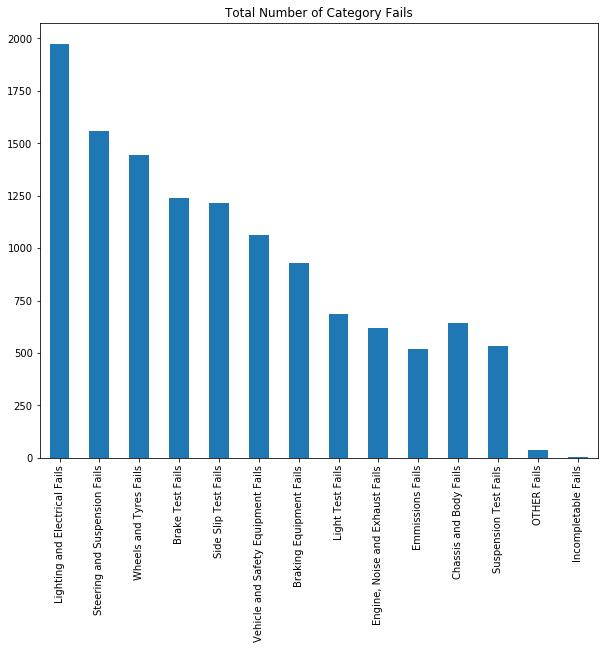

In [28]:
df.iloc[:, 2:16].sum().plot.bar()
plt.title('Total Number of Category Fails')

The iloc function is used to sum all of the failures together. If that the result is greater than 1, then the new Fail column is set to 1. If the sum is equal to 0, then the new Pass Column is set to 1.

In [14]:
df['Fail'] = np.where(df.iloc[:, 2:14].sum(1) > 0, 1, 0)

In [15]:
df['Pass'] = np.where(df.iloc[:, 2:14].sum(1) == 0, 1, 0)

In [16]:
df

,Manufacturer,Year,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails,Fail,Pass
0,Ford,2015,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Hyundai,2001,0,1,1,0,1,0,0,0,1,1,1,0,0,0,1,0
2,Mazda,2010,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,Hyundai,2004,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Renault,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,Skoda,2006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6,Nissan,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,Nissan,2002,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0
8,Honda,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,Opel,2002,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


Grouping the results by Manufacturer and Year can tell us which of the car makers and which year had the highest number of fails.

In [36]:
df_agg1 = df.groupby(['Manufacturer']).sum()
df_agg1

,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails,Fail,Pass
Manufacturer,,,,,,,,,,,,,,,,
Audi,119,85,98,78,74,68,59,36,39,35,48,37,2,0,466,180
BMW,138,99,90,73,71,59,53,44,39,34,35,35,0,0,461,171
Citroen,137,104,89,77,84,75,74,43,46,37,38,35,3,0,503,187
Ford,126,120,100,95,85,76,53,41,36,44,48,40,3,2,500,180
Honda,127,117,95,81,81,72,57,56,36,41,49,28,2,0,481,162
Hyundai,116,105,100,87,91,64,50,42,50,31,33,39,4,1,483,196
Mazda,145,114,111,80,89,77,65,50,48,23,42,35,1,0,523,176
Mercedes Benz,134,106,85,70,80,67,74,54,39,30,51,34,2,0,482,191
Nissan,133,99,97,98,81,72,62,46,42,50,37,42,2,0,500,172


In [37]:
df_agg2 = df.groupby(['Year']).sum()
df_agg2

,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails,Fail,Pass
Year,,,,,,,,,,,,,,,,
2000,113,79,77,76,66,63,55,43,37,34,33,36,3,0,425,161
2001,117,83,86,85,63,62,52,45,34,29,47,29,3,0,431,150
2002,136,98,89,87,74,69,50,38,39,38,49,29,2,0,460,159
2003,127,96,77,87,69,61,71,43,52,34,38,41,3,1,468,156
2004,128,100,95,76,91,78,69,45,36,24,35,32,2,1,480,161
2005,115,109,80,70,75,59,63,40,38,43,31,27,1,1,448,142
2006,105,104,101,76,70,79,58,34,35,34,36,28,1,0,453,159
2007,105,86,91,71,73,49,38,38,27,24,36,21,0,2,406,150
2008,107,81,94,59,60,60,41,45,41,30,38,33,2,0,411,151


In [19]:
df.groupby(['Manufacturer','Year']).sum()

Lighting and Electrical Fails  \
Manufacturer Year                                  
Audi         2000                              9   
             2001                              8   
             2002                             13   
             2003                             11   
             2004                              4   
             2005                              7   
             2006                              4   
             2007                              2   
             2008                              7   
             2009                             11   
             2010                             10   
             2011                              3   
             2012                              2   
             2013                              6   
             2014                              6   
             2015                              4   
             2016                             12   
BMW          2000                              8   
             2001                              9   
             2002                             10   
             2003                              6   
             2004                              8   
             2005                              8   
             2006                              4   
             2007                             11   
             2008                             10   
             2009                             11   
             2010                              9   
             2011                             12   
             2012                              8   
...                                          ...   
Toyota       2004                             11   
             2005                              9   
             2006                              5   
             2007                             10   
             2008                              8   
             2009                              8   
             2010                              8   
             2011                              8   
             2012                             10   
             2013                              5   
             2014                              7   
             2015                             11   
             2016                              5   
Volkswagen   2000                              8   
             2001                              6   
             2002                             10   
             2003                              6   
             2004                              7   
             2005                              5   
             2006                              9   
             2007                              7   
             2008                              6   
             2009                              6   
             2010                              5   
             2011                             10   
             2012                              5   
             2013                              3   
             2014                              4   
             2015                              2   
             2016                              7   

                   Steering and Suspension Fails  Wheels and Tyres Fails  \
Manufacturer Year                                                          
Audi         2000                              5                       6   
             2001                              9                       6   
             2002                              3                       3   
             2003                              4                       2   
             2004                              4                       5   
             2005                              6                       7   
             2006                              6                       8   
             2007                              2          

In this mock up data, the car with the highest % failure rate is Peugeot with 76% while the lowest is Hyundai with 71.13%.

In [59]:
df_agg1['% Fail'] = (100*(df_agg1['Fail'])/(df_agg1['Fail']+df_agg1['Pass']))
df_agg1

,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails,Fail,Pass,% Fail
Manufacturer,,,,,,,,,,,,,,,,,
Audi,119,85,98,78,74,68,59,36,39,35,48,37,2,0,466,180,72.136223
BMW,138,99,90,73,71,59,53,44,39,34,35,35,0,0,461,171,72.943038
Citroen,137,104,89,77,84,75,74,43,46,37,38,35,3,0,503,187,72.898551
Ford,126,120,100,95,85,76,53,41,36,44,48,40,3,2,500,180,73.529412
Honda,127,117,95,81,81,72,57,56,36,41,49,28,2,0,481,162,74.805599
Hyundai,116,105,100,87,91,64,50,42,50,31,33,39,4,1,483,196,71.134021
Mazda,145,114,111,80,89,77,65,50,48,23,42,35,1,0,523,176,74.821173
Mercedes Benz,134,106,85,70,80,67,74,54,39,30,51,34,2,0,482,191,71.619614
Nissan,133,99,97,98,81,72,62,46,42,50,37,42,2,0,500,172,74.404762


In this mock up data, the year with the highest % failure rate is 2010 with 77% while the lowest is 2011 with 71.43%.

In [56]:
df_agg2['% Fail'] = (100*(df_agg2['Fail'])/(df_agg2['Fail']+df_agg2['Pass']))
df_agg2

,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails,Fail,Pass,% Fail
Year,,,,,,,,,,,,,,,,,
2000,113,79,77,76,66,63,55,43,37,34,33,36,3,0,425,161,72.525597
2001,117,83,86,85,63,62,52,45,34,29,47,29,3,0,431,150,74.182444
2002,136,98,89,87,74,69,50,38,39,38,49,29,2,0,460,159,74.313409
2003,127,96,77,87,69,61,71,43,52,34,38,41,3,1,468,156,75.000000
2004,128,100,95,76,91,78,69,45,36,24,35,32,2,1,480,161,74.882995
2005,115,109,80,70,75,59,63,40,38,43,31,27,1,1,448,142,75.932203
2006,105,104,101,76,70,79,58,34,35,34,36,28,1,0,453,159,74.019608
2007,105,86,91,71,73,49,38,38,27,24,36,21,0,2,406,150,73.021583
2008,107,81,94,59,60,60,41,45,41,30,38,33,2,0,411,151,73.131673


(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.]),
 <a list of 8 Text xticklabel objects>)

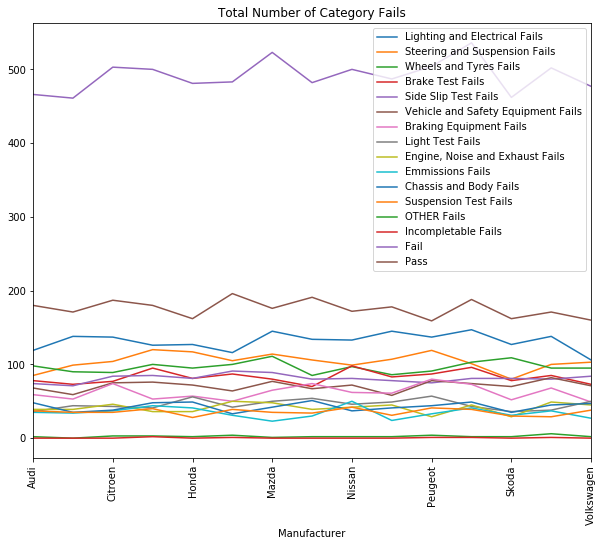

In [34]:
df.groupby(['Manufacturer']).sum().plot.line()
plt.title('Total Number of Category Fails')
plt.xticks(rotation=90)

### Future Project

The data here is only a mock up of the NCT results for 2016. The probability distributions are set equally across the year and manufacturer. In reality it is very different. The year of the car has a huge impact on the results as can be seen from the table below:

|Year	|% Fails|
|-------|------|
|2000	|68.49|
|2001	|67.12|
|2002	|65.94|
|2003	|63.13|
|2004	|59.65|
|2005	|56.72|
|2006	|54.92|
|2007	|46.71|
|2008	|43.59|
|2009	|40.31|
|2010	|31.52|
|2011	|25.67|
|2012	|19.92|
|2013	|14.82|
|2014	|17.38|
|2015	|18.96|
|2016	|13.09|

The manufacturer type also has a large impact on the pass and failure rate:

|Manufacture	|% Fails|
|-------|------|
|RENAULT	|59.33|
|PEUGEOT	|57.42|
|CITROEN	|56.20|
|OPEL	|54.68|
|NISSAN	|54.18|
|FORD	|53.60|
|VOLKSWAGEN	|52.11|
|MERCEDES BENZ	|51.57|
|AUDI	|51.16|
|HYUNDAI	|51.04|
|BMW	|50.03|
|MAZDA	|49.88|
|HONDA	|49.20|
|TOYOTA	|46.50|
|SKODA	|45.73|

A future project could be to try and replicate the pass and fail rates for both the year of the car and the manufacture however I was unable to set the probability distributions to vary depending on these variables.